In [1]:
import numpy as np
from glob import glob

import des_utils
import des_io

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
1 2
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 3
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
2 2
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
3 3
0 0
0 0
0 0
0 0
1 1
0 0
1 1
2 2
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 2
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
3 3
0 0
2 2
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
1 1
1 2
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
2 2
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 1
2 3
0 0
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
2 3
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

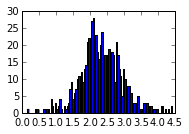

In [3]:
filetypes = ['sim','data']
fieldtypes = ['shallow','deep']
dict1 = dict()
for filetype in filetypes:
    if filetype == 'sim':
        files = glob("../ZD_KNDES_TEST/*DAT")
    elif filetype == 'data':
        files = glob("../DESY1_numepoch1_iz_real_text/*.dat")
    thelist,theheaders = des_utils.get_all_obs(files)
    shallow_list,deep_list = des_utils.get_depth_lists(thelist)
    for dnum,depth_list in enumerate([shallow_list,deep_list]):
        zbandinfo = des_utils.get_band_info(depth_list,'z')
        ibandinfo = des_utils.get_band_info(depth_list,'i')
        ztrig = des_utils.trigger_selector(zbandinfo)
        itrig = des_utils.trigger_selector(ibandinfo)
        if fieldtypes[dnum] == 'shallow':
            zsellist,isellist = des_utils.common_trignite_selector(zbandinfo,ibandinfo,1,0)
        elif fieldtypes[dnum] == 'deep':
            zsellist,isellist = des_utils.common_trignite_selector(zbandinfo,ibandinfo,1,1)
        if filetype == 'sim':
            zSNR_sel = des_utils.get_SNR_selector(zbandinfo)
            iSNR_sel = des_utils.get_SNR_selector(ibandinfo)
            trig_flags_list,anytrigs = des_utils.get_trig_flags_list(ztrig,itrig,zsellist,isellist,zSNR_sel,iSNR_sel)
        elif filetype =='data':
            trig_flags_list,anytrigs = des_utils.get_trig_flags_list(ztrig,itrig,zsellist,isellist)
        MJDtriglist = des_utils.get_trig_MJD_list(zbandinfo,trig_flags_list,zsellist)
        detection_flags_list = des_utils.get_detection_flags_list(MJDtriglist,zbandinfo,ibandinfo)
        colors = []
        for i in range(0,len(trig_flags_list)):
            if anytrigs[i]:
                imag = -2.5*np.log(ibandinfo[i][2][itrig[i] & isellist[i]][0])
                zmag = -2.5*np.log(zbandinfo[i][2][ztrig[i] & zsellist[i]][0])
                colors.append(imag-zmag)
        plt.figure(1)
        if filetype == 'sim':
            if dnum == 0:
                plt.subplot(221)
            elif dnum == 1:
                plt.subplot(222)     
        if filetype =='data':
            if dnum == 0:
                plt.subplot(223)
            elif dnum == 1:
                plt.subplot(224)
        plt.hist(colors,bins=100);

'deep'